In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import scipy as sp
import powerlaw

In [2]:
df = pd.read_csv("spread_locator_dataset.csv")
df

,transaction_id,customer_id,transaction_amount,transaction_date,transaction_count,region,transaction_status
0,e98aa092-3770-4fdb-9502-5b5a6a244811,CUST2824,3821.34,26-01-2023,3,North,Fail
1,11ba6918-dba0-41e5-96cf-f5a7b95f0103,CUST1409,2781.84,28-01-2023,0,East,Fail
2,82b7654b-6eb7-4579-89a0-1a9edec0a7bb,CUST5506,4120.97,28-01-2023,0,South,Fail
3,f7166574-f400-4d53-b526-0b11f6619ddf,CUST5012,6383.78,18-01-2023,2,South,Success
4,8632fe26-b507-4068-9c68-1b2fa04fecb3,CUST4657,2651.61,04-01-2023,4,North,Success
...,...,...,...,...,...,...,...
215,10c2a8f2-89d0-485c-bf8f-9508d32a02fc,CUST5563,4356.76,12-01-2023,2,South,Fail
216,5618814b-f7e2-424d-9617-9fc8d8643370,CUST8579,2025.53,29-01-2023,6,South,Fail
217,5636c9e7-9d54-4654-9c89-fdf31be87d96,CUST5092,2648.08,30-01-2023,1,West,Fail
218,6ba09450-a455-4983-bbad-3dad292cc839,CUST2235,2338.62,26-01-2023,3,North,Success


### **1. Fit the data to Bernoulli and Binomial distributions (transaction occurrence & weekly count).**

C:\Users\devsu\AppData\Local\Temp\ipykernel_1168\3829415459.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['transaction_date'] = pd.to_datetime(df['transaction_date'])


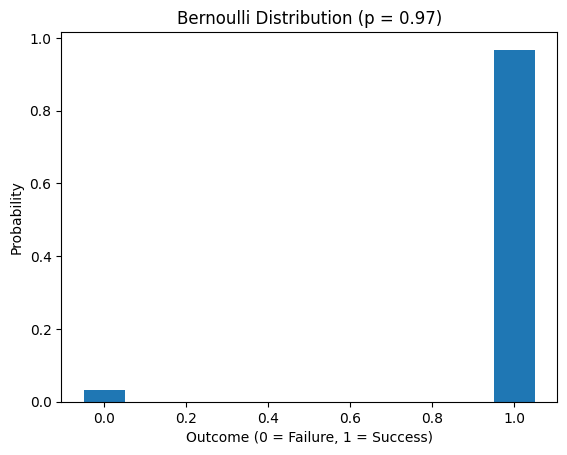

Probability of success (p): 0.97
Probability of failure (1-p): 0.03


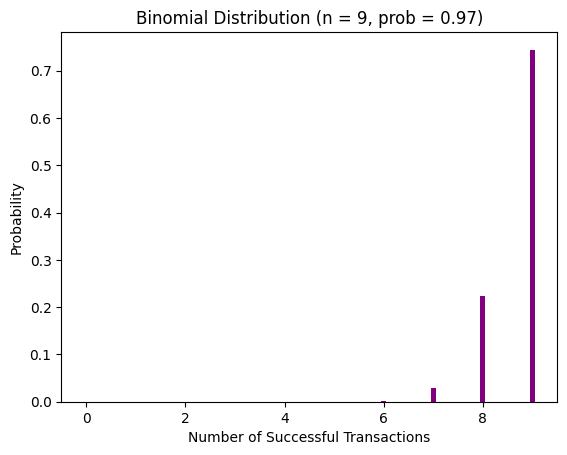

Probability of 0 successful transactions: 0.0000
Probability of 1 successful transactions: 0.0000
Probability of 2 successful transactions: 0.0000
Probability of 3 successful transactions: 0.0000
Probability of 4 successful transactions: 0.0000
Probability of 5 successful transactions: 0.0001
Probability of 6 successful transactions: 0.0023
Probability of 7 successful transactions: 0.0298
Probability of 8 successful transactions: 0.2233
Probability of 9 successful transactions: 0.7445


In [3]:
# Converting all the Transaction_status in numeric form.
df['transaction_outcomes'] = np.where(df['transaction_status'] == "Success",1,0)

df['transaction_date'] = pd.to_datetime(df['transaction_date'])

daily_occurance = df.groupby(df['transaction_date'].dt.date)['transaction_outcomes'].max()

# Now calculating the Mean.
prob = daily_occurance.mean()

# Fit the bernoulli distribution.
bernoulli_dist = sp.stats.bernoulli(prob)

# calculating the probability using the Probability Mass Function (PMF)
x = [1,0] # It can only have two outcomes (Success = 1 , Fail = 0)
pmf = bernoulli_dist.pmf(x)


# Plot the PMF
plt.bar(x, pmf, width=0.1)
plt.xlabel('Outcome (0 = Failure, 1 = Success)')
plt.ylabel('Probability')
plt.title(f'Bernoulli Distribution (p = {prob:.2f})')
plt.show()

# Step 5: Print the probability of success (p) and failure (1-p)
print(f'Probability of success (p): {prob:.2f}')
print(f'Probability of failure (1-p): {1 - prob:.2f}')

n = df['transaction_count'].max() 
binom_rv = sp.stats.binom(n, prob)

# Generating and plotting the PMF for Binomial distribution
binom_x = list(range(n + 1))  # Possible number of successful transactions (0 to n)
binom_pmf = binom_rv.pmf(binom_x)

# Plot the PMF for Binomial
plt.bar(binom_x, binom_pmf, color='purple', width=0.1)
plt.xlabel('Number of Successful Transactions')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution (n = {n}, prob = {prob:.2f})')
plt.show()

# Print the probability mass function for Binomial distribution at each possible outcome
for x_val, p in zip(binom_x, binom_pmf):
    print(f'Probability of {x_val} successful transactions: {p:.4f}')


### **2. Fit the data to Poisson distribution (number of transactions per day).**

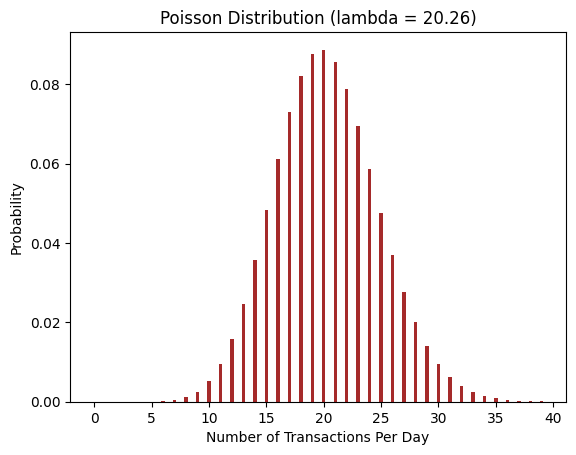

Probability of 0 transactions per day: 0.0000
Probability of 1 transactions per day: 0.0000
Probability of 2 transactions per day: 0.0000
Probability of 3 transactions per day: 0.0000
Probability of 4 transactions per day: 0.0000
Probability of 5 transactions per day: 0.0000
Probability of 6 transactions per day: 0.0002
Probability of 7 transactions per day: 0.0004
Probability of 8 transactions per day: 0.0011
Probability of 9 transactions per day: 0.0025
Probability of 10 transactions per day: 0.0051
Probability of 11 transactions per day: 0.0094
Probability of 12 transactions per day: 0.0159
Probability of 13 transactions per day: 0.0247
Probability of 14 transactions per day: 0.0358
Probability of 15 transactions per day: 0.0484
Probability of 16 transactions per day: 0.0612
Probability of 17 transactions per day: 0.0730
Probability of 18 transactions per day: 0.0821
Probability of 19 transactions per day: 0.0876
Probability of 20 transactions per day: 0.0887
Probability of 21 trans

In [10]:
# Aggregating the data to get number of transactions per day.
transaction_daily = df.groupby(df['transaction_date'])['transaction_count'].sum()

# Calculating the mean (lambda)
mean_value = transaction_daily.mean()

# calculating the poission distribution
poisson_dist = sp.stats.poisson(mean_value)

# Generate and plot the probability mass function (PMF) for Poisson distribution
x = range(0, int(transaction_daily.max()) + 1)  # Possible number of transactions per day (0 to max)
poisson_pmf = poisson_dist.pmf(x)

# Plotting the Poission Distribution.
plt.bar(x, poisson_pmf, color='brown', width=0.3)
plt.xlabel('Number of Transactions Per Day')
plt.ylabel('Probability')
plt.title(f'Poisson Distribution (lambda = {mean_value:.2f})')
plt.show()

for transaction_count, prob in zip(x, poisson_pmf):
    print(f'Probability of {transaction_count} transactions per day: {prob:.4f}')

### **3. Model transaction amounts using Log-Normal and Power Law distributions.**

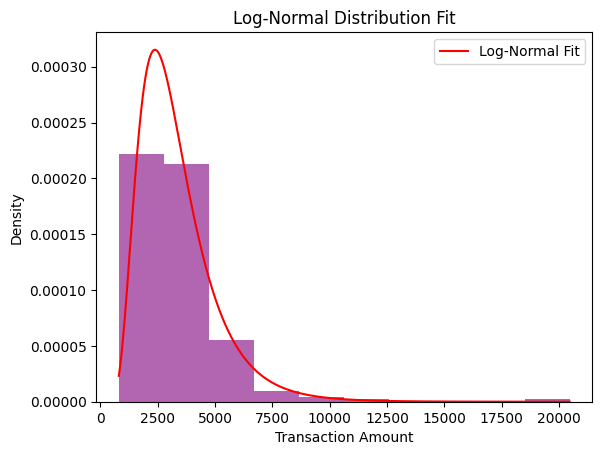

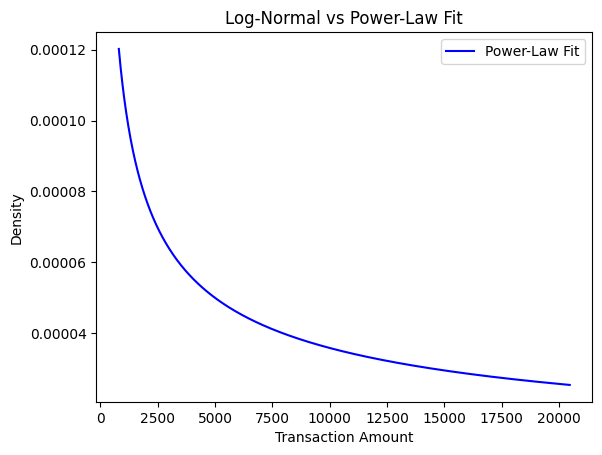

In [5]:
amounts = df['transaction_amount']
# Creating Log-normal Distribution.
shape, loc, scale = sp.stats.lognorm.fit(amounts, floc=0)
x = np.linspace(min(amounts), max(amounts), 1000)
pdf_lognorm = sp.stats.lognorm.pdf(x, shape, loc=loc, scale=scale)


# Plotting the graph
plt.hist(df['transaction_amount'], bins=10, density=True, alpha=0.6, color='purple')
plt.plot(x, pdf_lognorm, color='r', label='Log-Normal Fit')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.title('Log-Normal Distribution Fit')
plt.legend()
plt.show()

# Creating Power law distribution.
alpha, loc, scale = sp.stats.powerlaw.fit(amounts, floc=0)
pdf_powerlaw = sp.stats.powerlaw.pdf(x, alpha, loc=loc, scale=scale)

# Plotting the graph.
plt.plot(x, pdf_powerlaw, color='blue', label='Power-Law Fit')
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.title("Log-Normal vs Power-Law Fit")
plt.legend()
plt.show()


### **4 Generate and interpret Q-Q plot to test normality.**

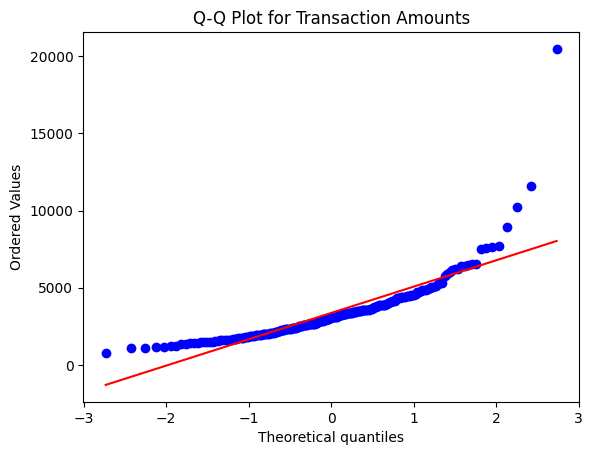

In [6]:
# Generate the Q-Q plot to check for normality
sp.stats.probplot(df['transaction_amount'], dist="norm", plot=plt)

# Display the plot
plt.title('Q-Q Plot for Transaction Amounts')
plt.show()

Interpreting the Q-Q plot.

  - If the points bend away from the line, the data may be skewed (either positively or negatively).

### **5. Apply Box-Cox Transform to stabilize variance.**

Optimal lambda for Box-Cox: -0.18


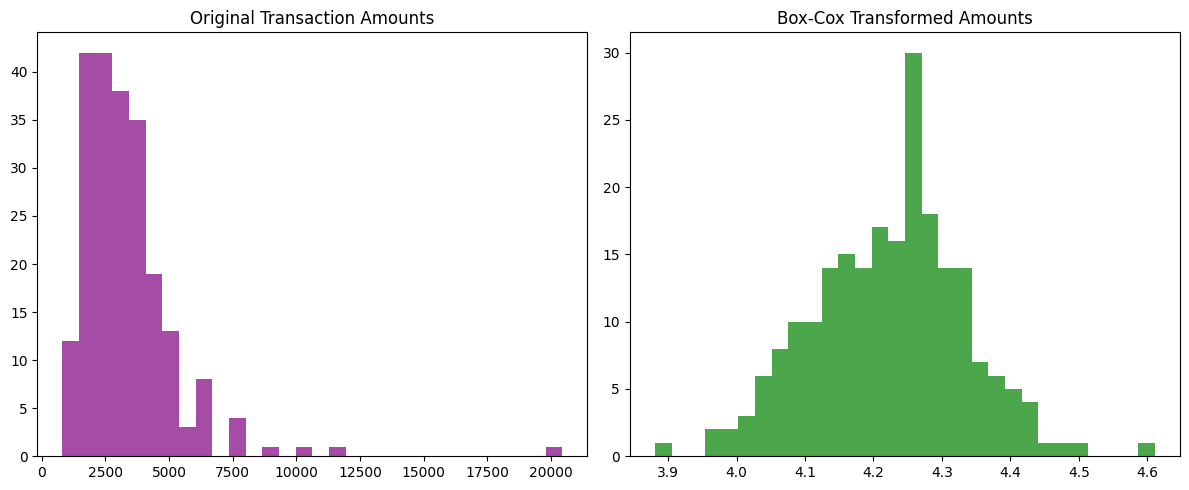

In [7]:
amounts_boxcox,fitted_lambda = sp.stats.boxcox(amounts)
print(f"Optimal lambda for Box-Cox: {fitted_lambda:.2f}")

# Comparing the data
plt.figure(figsize=(12,5))

# Original data histogram
plt.subplot(1,2,1)
plt.hist(amounts, bins=30, color="purple", alpha=0.7)
plt.title("Original Transaction Amounts")

# Transformed data histogram
plt.subplot(1,2,2)
plt.hist(amounts_boxcox, bins=30, color="green", alpha=0.7)
plt.title("Box-Cox Transformed Amounts")
plt.tight_layout()
plt.show()

### **6. Calculate Z scores for transaction amounts and compute probability of transactions exceeding ₹5000.**

Z-score for ₹5000: 0.82
Probability of a transaction exceeding ₹5000: 0.2052


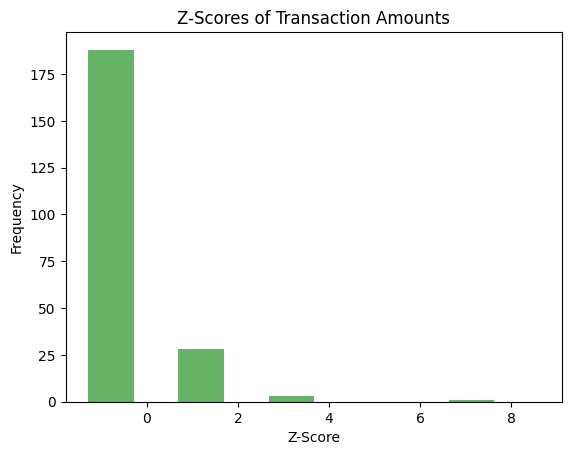

In [17]:
# calculating the Z-score first.
mean_amounts = amounts.mean()
std_amounts = amounts.std()
df['z_score'] = (amounts - mean_amounts)/std_amounts

# Finding the probability for the transaction of ₹5000
z_5000 = (5000 - mean_amounts) / std_amounts
print(f"Z-score for ₹5000: {z_5000:.2f}")

# Now finding the probability of transactions exceeding ₹5000 using the CDF.
above_5000 = 1-sp.stats.norm.cdf(5000,mean_amounts,std_amounts)
print(f"Probability of a transaction exceeding ₹5000: {above_5000:.4f}")

# Visualizing the data for the better understanding
plt.hist(df['z_score'], bins=5, color='g', alpha=0.6, width=1)
plt.title('Z-Scores of Transaction Amounts')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.show()


### **7. Plot and interpret PDF and CDF for transaction amounts.**

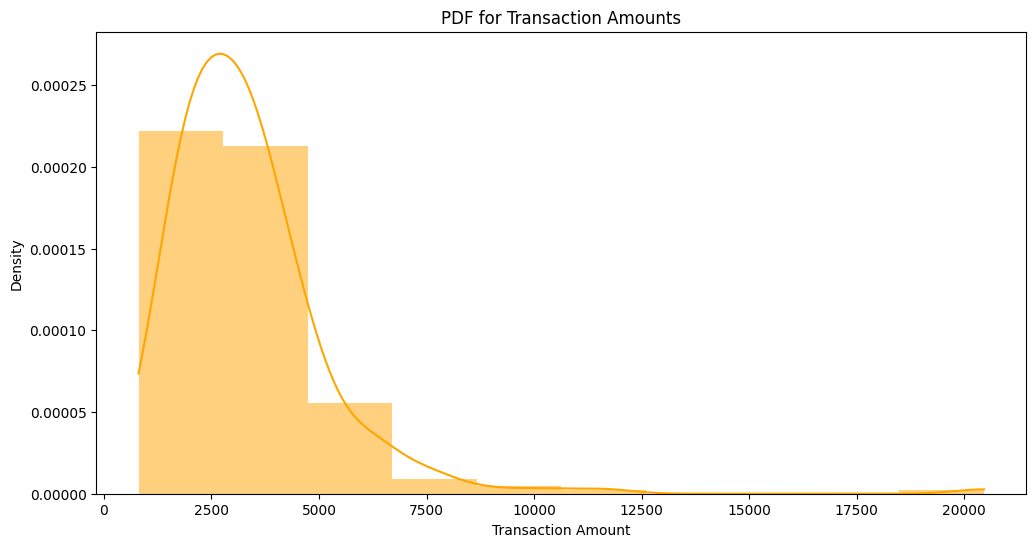

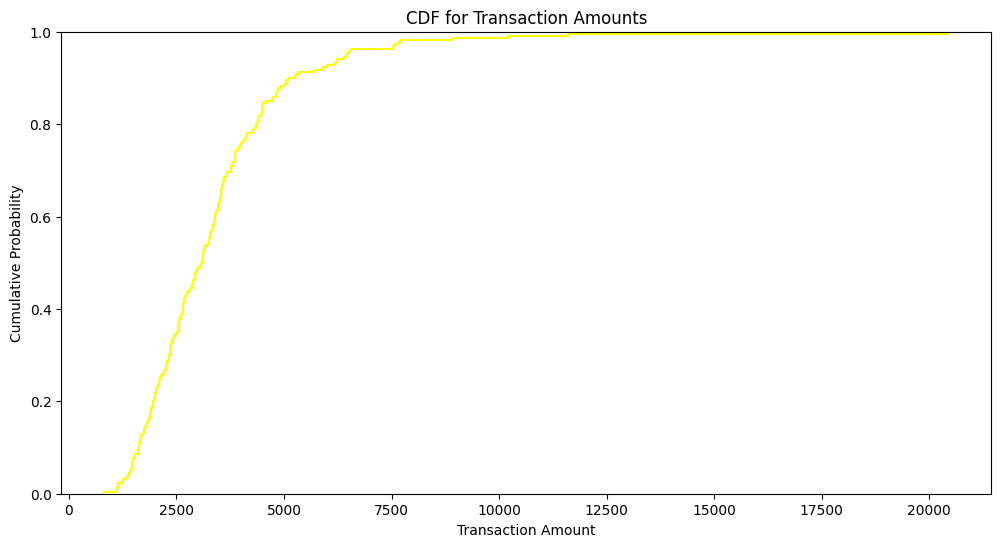

In [9]:
# Plotting the PDF (Probability Density Function) for transaction amounts
plt.figure(figsize=(12, 6))
sns.histplot(df['transaction_amount'], kde=True, color='orange', bins=10, stat='density', linewidth=0)
plt.title('PDF for Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()

# Plotting the CDF (Cumulative Distribution Function) for transaction amounts
plt.figure(figsize=(12, 6))
sns.ecdfplot(df['transaction_amount'], color='yellow')
plt.title('CDF for Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Cumulative Probability')
plt.show()

-  **PDF (Probability Density Function):**
The PDF plot shows how transaction amounts are distributed. The histogram with the KDE curve indicates that most transactions are concentrated in a certain lower range of amounts, while a few high-value transactions create a right-skewed tail. This means smaller/medium transactions are far more common than very large ones.

-  **CDF (Cumulative Distribution Function):**
The CDF starts at 0 and smoothly increases to 1, showing how probabilities accumulate. From the curve, we can see that a large percentage of transactions fall below a certain threshold. For example, if the CDF reaches 0.8 around X, it means 80% of all transactions are less than or equal to X amount. This helps us identify the cutoff values where most of the transaction amounts lie.